# Decision Tree Classifiers
## Terminology used in decision trees
Decision Trees do not have much machinery as compared with logistic regression. Here we
have a few metrics to study. We will majorly focus on impurity measures; decision trees
split variables recursively based on set impurity criteria until they reach some stopping
criteria (minimum observations per terminal node, minimum observations for split at any
node, and so on):

### Entropy: Entropy came from information theory and is the measure of impurity in data. If the sample is completely homogeneous, the entropy is zero, and if the sample is equally divided, it has entropy of one. In decision trees, the predictor with most heterogeneousness will be considered nearest to the root node to classify the given data into classes in a greedy mode. We will cover this topic in more depth in this chapter:

### Entropy = - Σ p * log 2 p

    - Where n = number of classes. Entropy is maximum in the middle, with avalue of 1 and minimum at the extremes with a value of 0. The low value of entropy is desirable, as it will segregate classes better.
    
### Information Gain: Information gain is the expected reduction in entropy caused by partitioning the examples according to a given attribute. The idea is to start with mixed classes and to continue partitioning until each node reaches its observations of purest class. At every stage, the variable with maximum information gain is chosen in a greedy fashion.
#####  Information Gain = Entropy of Parent - sum (weighted % * Entropy of Child)
##### Weighted % = Number of observations in particular child/sum (observations in all child nodes)

### Gini: Gini impurity is a measure of misclassification, which applies in a multiclassclassifier context. Gini works similar to entropy, except Gini is quicker to
calculate: Gini = 1- Σp2



# HR attrition data example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
hrattr_data = pd.read_csv(r"C:\Users\Admin\Downloads\Lecture\ibm-hr-analytics-attrition-dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
hrattr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hrattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [9]:
{i:v  for i,v in enumerate(hrattr_data) }

{0: 'Age',
 1: 'Attrition',
 2: 'BusinessTravel',
 3: 'DailyRate',
 4: 'Department',
 5: 'DistanceFromHome',
 6: 'Education',
 7: 'EducationField',
 8: 'EmployeeCount',
 9: 'EmployeeNumber',
 10: 'EnvironmentSatisfaction',
 11: 'Gender',
 12: 'HourlyRate',
 13: 'JobInvolvement',
 14: 'JobLevel',
 15: 'JobRole',
 16: 'JobSatisfaction',
 17: 'MaritalStatus',
 18: 'MonthlyIncome',
 19: 'MonthlyRate',
 20: 'NumCompaniesWorked',
 21: 'Over18',
 22: 'OverTime',
 23: 'PercentSalaryHike',
 24: 'PerformanceRating',
 25: 'RelationshipSatisfaction',
 26: 'StandardHours',
 27: 'StockOptionLevel',
 28: 'TotalWorkingYears',
 29: 'TrainingTimesLastYear',
 30: 'WorkLifeBalance',
 31: 'YearsAtCompany',
 32: 'YearsInCurrentRole',
 33: 'YearsSinceLastPromotion',
 34: 'YearsWithCurrManager'}

In [10]:
hrattr_data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
hrattr_data['Attrition']=hrattr_data['Attrition'].map({'Yes':1,'No':0})

In [12]:
hrattr_data['Attrition'].unique()

array([1, 0], dtype=int64)

In [14]:
df=hrattr_data.copy()

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Dummy variables are created for all seven categorical variables (shown here in alphabetical
order), which are Business Travel, Department, Education Field, Gender, Job
Role, Marital Status, and Overtime. We have ignored four variables from the analysis,
as they do not change across the observations, which are Employee count, Employee
number, Over18, and Standard Hours:

In [16]:
dummy_busnstrvl = pd.get_dummies(df['BusinessTravel'],prefix='busns_trvl')
dummy_dept = pd.get_dummies(df['Department'], prefix='dept')
dummy_edufield = pd.get_dummies(df['EducationField'],prefix='edufield')
dummy_gender = pd.get_dummies(df['Gender'], prefix='gend')
dummy_jobrole = pd.get_dummies(df['JobRole'],prefix='jobrole')
dummy_maritstat = pd.get_dummies(df['MaritalStatus'],prefix='maritalstat')
dummy_overtime =pd.get_dummies(df['OverTime'],prefix='overtime')

In [17]:
continuous_columns = ['Age','DailyRate','DistanceFromHome',
                      'Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
                      'JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                      'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating',
                      'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears',
                      'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

In [18]:
hrattr_continuous = df[continuous_columns]

In [19]:
# In the following step, both derived dummy variables from categorical variables and straight continuous variables are combined:
hrattr_data_new = pd.concat([dummy_busnstrvl, dummy_dept, 
                             dummy_edufield, dummy_gender, dummy_jobrole, dummy_maritstat,
                             dummy_overtime, hrattr_continuous, df['Attrition']],axis=1)

Here, we have not removed one extra derived dummy variable for each
categorical variable due to the reason that multi-collinearity does not
create a problem in decision trees as it does in either logistic or linear
regression, hence we can simply utilize all the derived variables in the rest
of the chapter, as all the models utilize decision trees as an underlying
model, even after performing ensembles of it.

In [20]:
X = hrattr_data_new.drop(['Attrition'], axis=1)
y = hrattr_data_new['Attrition']

                         

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, 
                                                 random_state=42)

In [22]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

The parameters selected for the DT classifier are in the following code with splitting
criterion as Gini, Maximum depth as 5, minimum number of observations required for
qualifying split is 2, and the minimum samples that should be present in the terminal node
is 1:

In [23]:
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2, min_samples_leaf=1,random_state=42)
dt_fit.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [24]:
print ("\nDecision Tree - Train Confusion Matrix\n\n",
       pd.crosstab(y_train, dt_fit.predict(x_train),
                   rownames =["Actuall"],colnames = ["Predicted"]))
from sklearn.metrics import accuracy_score, classification_report
print ("\nDecision Tree - Train accuracy\n\n",round(accuracy_score(y_train, dt_fit.predict(x_train)),3))
print ("\nDecision Tree - Train Classification Report\n",classification_report(y_train, dt_fit.predict(x_train)))


Decision Tree - Train Confusion Matrix

 Predicted    0   1
Actuall           
0          844   9
1           98  78

Decision Tree - Train accuracy

 0.896

Decision Tree - Train Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       853
           1       0.90      0.44      0.59       176

    accuracy                           0.90      1029
   macro avg       0.90      0.72      0.77      1029
weighted avg       0.90      0.90      0.88      1029



In [25]:
print ("\n\nDecision Tree - Test ConfusionMatrix\n\n",pd.crosstab(y_test, dt_fit.predict(x_test),rownames =["Actuall"],colnames = ["Predicted"]))
print ("\nDecision Tree - Test accuracy",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
print ("\nDecision Tree - Test Classification Report\n",classification_report( y_test, dt_fit.predict(x_test)))



Decision Tree - Test ConfusionMatrix

 Predicted    0   1
Actuall           
0          361  19
1           49  12

Decision Tree - Test accuracy 0.846

Decision Tree - Test Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.39      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.63      0.57      0.59       441
weighted avg       0.81      0.85      0.82       441



By carefully observing the results, we can infer that, even though the test accuracy is high
(84.6%), the precision and recall of one category (Attrition = Yes) is low (precision = 0.39 and
recall = 0.20). This could be a serious issue when management tries to use this model to
provide some extra benefits proactively to the employees with a high chance of attrition
prior to actual attrition, as this model is unable to identify the real employees who will be
leaving. Hence, we need to look for other modifications; one way is to control the model by
using class weights. By utilizing class weights, we can increase the importance of a
particular class at the cost of an increase in other errors.


# Tuning class weights in decision tree classifier
In the following code, class weights are tuned to see the performance change in decision
trees with the same parameters. A dummy DataFrame is created to save all the results of
various precision-recall details of combinations:

In [37]:
dummyarray = np.empty((6,10))
dt_wttune = pd.DataFrame(dummyarray)

In [38]:
dt_wttune.columns = ["zero_wght","one_wght","tr_accuracy",
                     "tst_accuracy", "prec_zero","prec_one", "prec_ovll",
                     "recl_zero","recl_one","recl_ovll"]

In [39]:
# Weights for the zero category are verified from 0.01 to 0.5, as we know we do not want to explore cases where the zero category will be given higher weightage than one category:
zero_clwghts = [0.01,0.1,0.2,0.3,0.4,0.5]

In [43]:
for i in range(len(zero_clwghts)):
    clwght = {0:zero_clwghts[i],1:1.0-zero_clwghts[i]}
    dt_fit = DecisionTreeClassifier(criterion="gini", max_depth=5,
                                    min_samples_split=2, 
                                    min_samples_leaf=1,
                                    random_state=42,
                                    class_weight =clwght)
    dt_fit.fit(x_train,y_train)
    dt_wttune.loc[i, 'zero_wght'] = clwght[0]
    dt_wttune.loc[i, 'one_wght'] = clwght[1]
    dt_wttune.loc[i, 'tr_accuracy'] = round(accuracy_score(y_train,dt_fit.predict( x_train)),3)
    dt_wttune.loc[i, 'tst_accuracy'] =round(accuracy_score(y_test,dt_fit.predict( x_test)),3)
    clf_sp =classification_report(y_test,dt_fit.predict(x_test)).split()
    dt_wttune.loc[i, 'prec_zero'] = float(clf_sp[5])
    dt_wttune.loc[i, 'prec_one'] = float(clf_sp[10])
    #dt_wttune.loc[i, 'prec_ovll'] = float(clf_sp[17])
    dt_wttune.loc[i, 'recl_zero'] = float(clf_sp[6])
    dt_wttune.loc[i, 'recl_one'] = float(clf_sp[11])
    #dt_wttune.loc[i, 'recl_ovll'] = float(clf_sp[18])
    print ("\nClass Weights",clwght,"Trainaccuracy:",
           round(accuracy_score( y_train,dt_fit.predict(x_train)),3),
           "Testaccuracy:",round(accuracy_score(y_test, dt_fit.predict(x_test)),3))
    print ("Test ConfusionMatrix\n\n",
           pd.crosstab(y_test,dt_fit.predict( x_test),
                       rownames =["Actuall"],
                       colnames = ["Predicted"]))


Class Weights {0: 0.01, 1: 0.99} Trainaccuracy: 0.342 Testaccuracy: 0.272
Test ConfusionMatrix

 Predicted   0    1
Actuall           
0          65  315
1           6   55

Class Weights {0: 0.1, 1: 0.9} Trainaccuracy: 0.806 Testaccuracy: 0.732
Test ConfusionMatrix

 Predicted    0   1
Actuall           
0          282  98
1           20  41

Class Weights {0: 0.2, 1: 0.8} Trainaccuracy: 0.871 Testaccuracy: 0.83
Test ConfusionMatrix

 Predicted    0   1
Actuall           
0          341  39
1           36  25

Class Weights {0: 0.3, 1: 0.7} Trainaccuracy: 0.881 Testaccuracy: 0.839
Test ConfusionMatrix

 Predicted    0   1
Actuall           
0          345  35
1           36  25

Class Weights {0: 0.4, 1: 0.6} Trainaccuracy: 0.894 Testaccuracy: 0.832
Test ConfusionMatrix

 Predicted    0   1
Actuall           
0          346  34
1           40  21

Class Weights {0: 0.5, 1: 0.5} Trainaccuracy: 0.896 Testaccuracy: 0.846
Test ConfusionMatrix

 Predicted    0   1
Actuall           
0    

# Bagging classifier
As we have discussed already, decision trees suffer from high variance, which means if we
split the training data into two random parts separately and fit two decision trees for each
sample, the rules obtained would be very different. Whereas low variance and high bias
models, such as linear or logistic regression, will produce similar results across both
samples. Bagging refers to bootstrap aggregation (repeated sampling with replacement and
perform aggregation of results to be precise), which is a general purpose methodology to
reduce the variance of models. In this case, they are decision trees.
Aggregation reduces the variance, for example, when we have n independent observations
x1, x2 ,..., xn each with variance σ2 and the variance of the mean x̅ of the observations is
given by σ2/n, which illustrates by averaging a set of observations that it reduces variance.
Here, we are reducing variance by taking many samples from training data (also known as
bootstrapping), building a separate decision tree on each sample separately, averaging the
predictions for regression, and calculating mode for classification problems in order to
obtain a single low-variance model that will have both low bias and low variance:
In a bagging procedure, rows are sampled while selecting all the columns/variables
(whereas, in random forest, both rows and columns would be sampled, which we will cover
in the next section) and fitting individual trees for each sample. In the following diagram,
two colors (pink and blue) represent two samples, and for each sample, a few rows are
sampled, but all the columns (variables) are selected every time. One issue that exists due to
the selection of all columns is that most of the trees will describe the same story, in which
the most important variable will appear initially in the split, and this repeats in all the trees,
which will not produce de-correlated trees, so we may not get better performance when
applying variance reduction. This issue will be avoided in random forest (we will cover this
in the next section of the chapter), in which we will sample both rows and columns as well:

In the following code, the same HR data has been used to fit the bagging classifier in order
to compare the results apple to apple with respect to decision trees:

In [45]:
# Bagging Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [47]:
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                min_samples_leaf=1,random_state=42,class_weight = {0:0.3,1:0.7})
#Parameters used in bagging are, n_estimators to represent the number of individual 
# decision trees used as 5,000, maximum samples and features selected are 0.67 and 1.0
#respectively, which means it will select 2/3rd of observations for each tree and all the features.

In [48]:
bag_fit = BaggingClassifier(base_estimator= dt_fit,n_estimators=5000,
                            max_samples=0.67,max_features=1.0,
                            bootstrap=True,bootstrap_features=False,
                            n_jobs=-1,random_state=42)

In [49]:
bag_fit.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecate

In [50]:
print ("\nBagging - Train Confusion Matrix\n\n",
       pd.crosstab(y_train,bag_fit.predict(x_train),
                   rownames = ["Actuall"],
                   colnames = ["Predicted"]))
print ("\nBagging- Train accuracy",round(accuracy_score(y_train,bag_fit.predict(x_train)),3))
print ("\nBagging - Train ClassificationReport\n",classification_report(y_train, bag_fit.predict(x_train)))
print ("\n\nBagging - Test Confusion Matrix\n\n",
       pd.crosstab(y_test,bag_fit.predict(x_test),
                   rownames = ["Actuall"],
                   colnames = ["Predicted"]))
print ("\nBagging - Test accuracy",round(accuracy_score(y_test,bag_fit.predict(x_test)),3))
print ("\nBagging - Test ClassificationReport\n",classification_report(y_test, bag_fit.predict(x_test)))


Bagging - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          846    7
1           66  110

Bagging- Train accuracy 0.929

Bagging - Train ClassificationReport
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       853
           1       0.94      0.62      0.75       176

    accuracy                           0.93      1029
   macro avg       0.93      0.81      0.85      1029
weighted avg       0.93      0.93      0.92      1029



Bagging - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          372   8
1           49  12

Bagging - Test accuracy 0.871

Bagging - Test ClassificationReport
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.60      0.20      0.30        61

    accuracy                           0.87       441
   macro avg       0.74      0.59      0.61       441
weighted avg       0.84      0.87 

After analyzing the results from bagging, the test accuracy obtained was 87.3%, whereas for
decision tree it was 84.6%. Comparing the number of actual attrited employees identified,
there were 13 in bagging, whereas in decision tree there were 12, but the number of 0
classified as 1 significantly reduced to 8 compared with 19 in DT. Overall, bagging
improves performance over the single tree:

# Random forest classifier
Random forests provide an improvement over bagging by doing a small tweak that utilizes
de-correlated trees. In bagging, we build a number of decision trees on bootstrapped
samples from training data, but the one big drawback with the bagging technique is that it
selects all the variables. By doing so, in each decision tree, order of candidate/variable
chosen to split remains more or less the same for all the individual trees, which look
correlated with each other. Variance reduction on correlated individual entities does not
work effectively while aggregating them.

In random forest, during bootstrapping (repeated sampling with replacement), samples
were drawn from training data; not just simply the second and third observations randomly
selected, similar to bagging, but it also selects the few predictors/columns out of all
predictors (m predictors out of total p predictors).

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for
classification and m = p/3 for regression problems randomly to avoid correlation among the
individual trees. By doing so, significant improvement in accuracies can be achieved. This
ability of RF makes it one of the favorite algorithms used by the data science community, as
a winning recipe across various competitions or even for solving practical problems in
various industries.

In the following diagram, different colors represent different bootstrap samples. In the first
sample, the 1st, 3rd, 4th, and 7th columns are selected, whereas in the second bootstrap sample,
the 2nd, 3rd, 4th, and 5th columns are selected respectively. In this way, any columns can be
selected at random, whether they are adjacent to each other or not. Though the thumb rules
of sqrt (p) or p/3 are given, readers are encouraged to tune the number of predictors to be
selected:

Random forest classifier has been utilized from the scikit-learn package here for
illustration purposes:

In [51]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

The parameters used in random forest are: n_estimators representing the number of
individual decision trees used is 5000, maximum features selected are auto, which means it
will select sqrt(p) for classification and p/3 for regression automatically. Here is the
straightforward classification problem though. Minimum samples per leaf provides the
minimum number of observations required in the terminal node:

In [52]:
rf_fit = RandomForestClassifier(n_estimators=5000,criterion="gini",max_depth=5,
                                min_samples_split=2,bootstrap=True,max_features='auto',random_state=42,
                                min_samples_leaf=1,class_weight = {0:0.3,1:0.7})
rf_fit.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.3, 1: 0.7}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=5000, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [53]:
print ("\nRandom Forest - Train ConfusionMatrix\n\n",pd.crosstab(y_train, rf_fit.predict(x_train),rownames =["Actuall"],colnames = ["Predicted"]))
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))
print ("\nRandom Forest - Train ClassificationReport\n",classification_report( y_train, rf_fit.predict(x_train)))
print ("\n\nRandom Forest - Test ConfusionMatrix\n\n",pd.crosstab(y_test, rf_fit.predict(x_test),rownames =["Actuall"],colnames = ["Predicted"]))
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))
print ("\nRandom Forest - Test ClassificationReport\n",classification_report( y_test, rf_fit.predict(x_test)))


Random Forest - Train ConfusionMatrix

 Predicted    0    1
Actuall            
0          841   12
1           76  100

Random Forest - Train accuracy 0.914

Random Forest - Train ClassificationReport
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       853
           1       0.89      0.57      0.69       176

    accuracy                           0.91      1029
   macro avg       0.90      0.78      0.82      1029
weighted avg       0.91      0.91      0.91      1029



Random Forest - Test ConfusionMatrix

 Predicted    0   1
Actuall           
0          373   7
1           47  14

Random Forest - Test accuracy 0.878

Random Forest - Test ClassificationReport
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.67      0.23      0.34        61

    accuracy                           0.88       441
   macro avg       0.78      0.61      0.64       441

Random forest classifier produced 87.8% test accuracy compared with bagging 87.3%, and
also identifies 14 actually attrited employees in contrast with bagging, for which 13 attrited
employees have been identified:

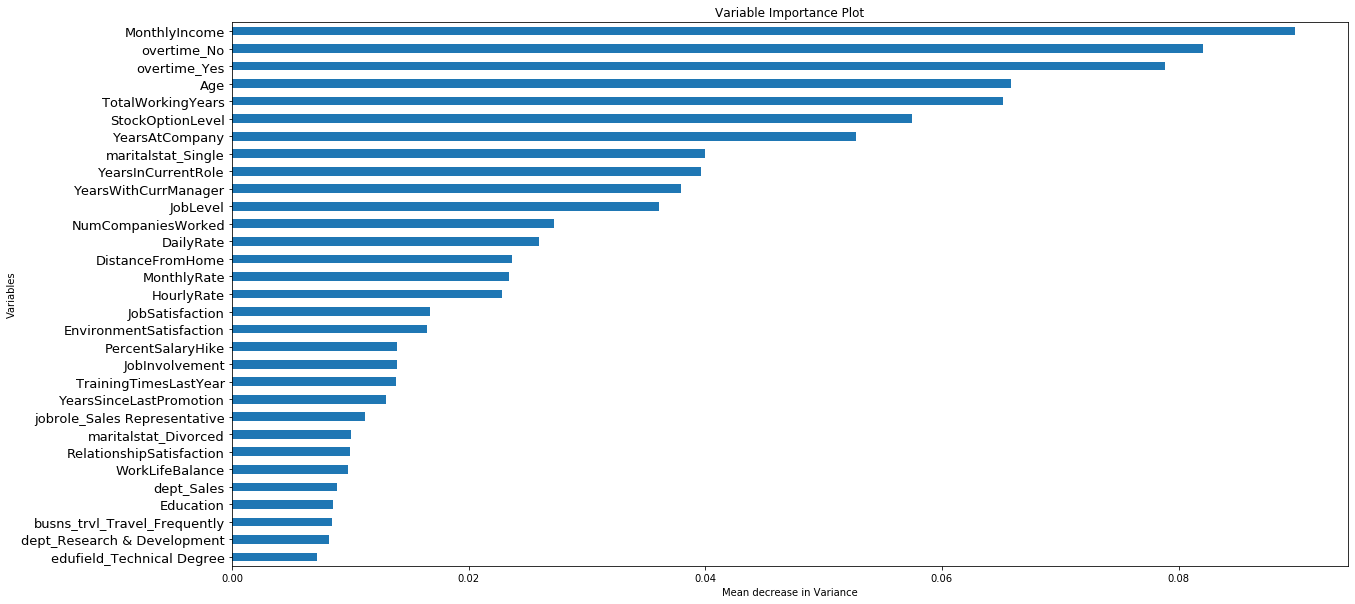

In [56]:
# Plot of Variable importance by mean decrease in gini
model_ranks =pd.Series(rf_fit.feature_importances_,index=x_train.columns,name='Importance').sort_values(ascending=False, inplace=False)
model_ranks.index.name= 'Variables'
top_features=model_ranks.iloc[:31].sort_values(ascending=True,inplace=False)

plt.figure(figsize=(20,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)

From the variable importance plot, it seems that the monthly income variable seems to be
most significant, followed by overtime, total working years, stock option levels, years at
company, and so on. This provides us with some insight into what are major contributing
factors that determine whether the employee will remain with the company or leave the
organization:

In [57]:
# Adaboost Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [58]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=1)

In [59]:
adabst_fit = AdaBoostClassifier(base_estimator=dtree,n_estimators=5000,learning_rate=0.05,random_state=42)

In [60]:
adabst_fit.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [61]:
print ("\nAdaBoost - Train Confusion Matrix\n\n", 
       pd.crosstab(y_train,adabst_fit.predict(x_train), rownames = ["Actuall"],colnames =["Predicted"]))
print ("\nAdaBoost - Trainaccuracy",round(accuracy_score(y_train,adabst_fit.predict(x_train)), 3))
print ("\nAdaBoost - Train ClassificationReport\n",classification_report(y_train,adabst_fit.predict(x_train)))


AdaBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          844    9
1           55  121

AdaBoost - Trainaccuracy 0.938

AdaBoost - Train ClassificationReport
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       853
           1       0.93      0.69      0.79       176

    accuracy                           0.94      1029
   macro avg       0.93      0.84      0.88      1029
weighted avg       0.94      0.94      0.93      1029



The result of the AdaBoost seems to be much better than the known best random forest classifiers in terms of the recall of 1 value. Though there is a slight decrease in accuracy to
86.8% compared with the best accuracy of 87.8%, the number of 1's predicted is 23 from the
RF, which is 14 with some expense of increase in 0's, but it really made good progress in
terms of identifying actual attriters:

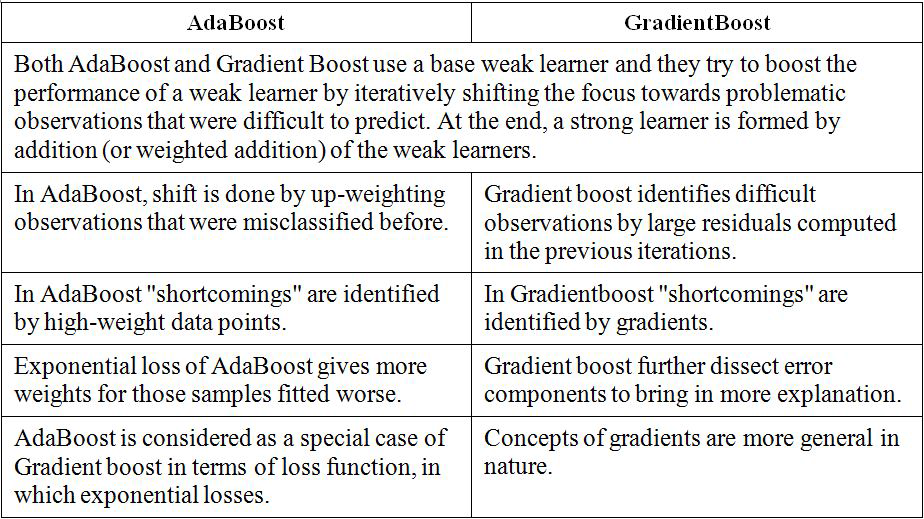

In [62]:
# Gradientboost Classifier
from sklearn.ensemble import GradientBoostingClassifier

Parameters used in the gradient boosting algorithms are as follows. Deviance has been used
for loss, as the problem we are trying to solve is 0/1 binary classification. The learning rate
has been chosen as 0.05, number of trees to build is 5000 trees, minimum sample per
leaf/terminal node is 1, and minimum samples needed in a bucket for qualification for
splitting is 2:

In [66]:
gbc_fit = GradientBoostingClassifier (loss='deviance',learning_rate=0.05,
                                      n_estimators=5000, min_samples_split=2,
                                      min_samples_leaf=1, max_depth=1, random_state=42)
gbc_fit.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:

print ("\nGradient Boost - Train ConfusionMatrix\n\n",
       pd.crosstab(y_train, gbc_fit.predict(x_train),rownames =["Actuall"],colnames = ["Predicted"]))
print ("\nGradient Boost - Trainaccuracy",round(accuracy_score(y_train, gbc_fit.predict(x_train)),3))
print ("\nGradient Boost - Train ClassificationReport\n",classification_report( y_train, gbc_fit.predict(x_train)))
print ("\n\nGradient Boost - Test ConfusionMatrix\n\n",
       pd.crosstab(y_test, gbc_fit.predict(x_test),
                   rownames = ["Actuall"],
                   colnames = ["Predicted"]))
print ("\nGradient Boost - Test accuracy",round(accuracy_score(y_test,gbc_fit.predict(x_test)),3)) 
print ("\nGradient Boost - TestClassification Report\n",classification_report( y_test,gbc_fit.predict(x_test)))


Gradient Boost - Train ConfusionMatrix

 Predicted    0    1
Actuall            
0          850    3
1           49  127

Gradient Boost - Trainaccuracy 0.949

Gradient Boost - Train ClassificationReport
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       853
           1       0.98      0.72      0.83       176

    accuracy                           0.95      1029
   macro avg       0.96      0.86      0.90      1029
weighted avg       0.95      0.95      0.95      1029



Gradient Boost - Test ConfusionMatrix

 Predicted    0   1
Actuall           
0          362  18
1           37  24

Gradient Boost - Test accuracy 0.875

Gradient Boost - TestClassification Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.57      0.39      0.47        61

    accuracy                           0.88       441
   macro avg       0.74      0.67      0.70     

If we analyze the results, Gradient boosting has given better results than AdaBoost with the
highest possible test accuracy of 87.5% with most 1's captured as 24, compared with
AdaBoost with which the test accuracy obtained was 86.8%. Hence, it has been proven that
it is no wonder why every data scientist tries to use this algorithm to win competitions!

# gradient boosting - XGBoost classifier
XGBoost is the new algorithm developed in 2014 by Tianqi Chen based on the Gradient
boosting principles. It has created a storm in the data science community since its inception.
XGBoost has been developed with both deep consideration in terms of system optimization
and principles in machine learning. The goal of the library is to push the extremes of the
computation limits of machines to provide scalable, portable, and accurate results:

In [71]:
# Xgboost Classifier
import xgboost as xgb
xgb_fit = xgb.XGBClassifier(max_depth=2, n_estimators=5000,learning_rate=0.05)
xgb_fit.fit(x_train, y_train)
print ("\nXGBoost - Train Confusion Matrix\n\n",
       pd.crosstab(y_train,xgb_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nXGBoost - Train accuracy",round(accuracy_score(y_train,xgb_fit.predict(x_train)),3))
print ("\nXGBoost - Train ClassificationReport\n",classification_report(y_train, xgb_fit.predict(x_train)))
print ("\n\nXGBoost - Test Confusion Matrix\n\n",
       pd.crosstab(y_test,xgb_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nXGBoost - Test accuracy",round(accuracy_score(y_test,xgb_fit.predict(x_test)),3))
print ("\nXGBoost - Test ClassificationReport\n",classification_report(y_test, xgb_fit.predict(x_test)))                                                            


XGBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          853    0
1            0  176

XGBoost - Train accuracy 1.0

XGBoost - Train ClassificationReport
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



XGBoost - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          361  19
1           38  23

XGBoost - Test accuracy 0.871

XGBoost - Test ClassificationReport
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       380
           1       0.55      0.38      0.45        61

    accuracy                           0.87       441
   macro avg       0.73      0.66      0.69       441
weighted avg       0.86      0.87  

The results obtained from XGBoost are almost similar to gradient boosting. The test
accuracy obtained was 87.1%, whereas boosting got 87.5%, and also the number of 1's
identified is 23 compared with 24 in gradient boosting. The greatest advantage of XGBoost
over Gradient boost is in terms of performance and the options available to control model
tune. By changing a few of them, makes XGBoost even beat gradient boost as well!